# 决策树
1. 描述：在机器学习中，决策树是一个预测模型，他代表的是对象属性与对象值之间的一种映射关系
2. 用途
    - 分类问题
    - 回归问题
3. 信息熵（信息增益）
    - 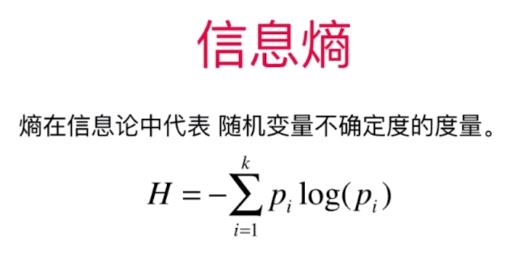
    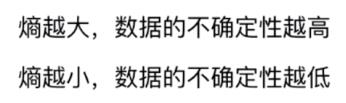
    - 划分后需使得系统整体的信息熵降低
4. 基尼系数
    - 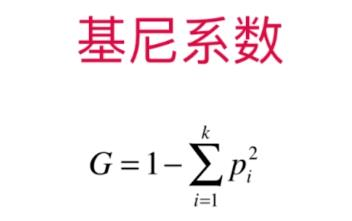
    - sklearn中的默认划分规则，由公式可知其计算速度比信息熵稍快，但二者效果大多数情况相当
5. CART
    - 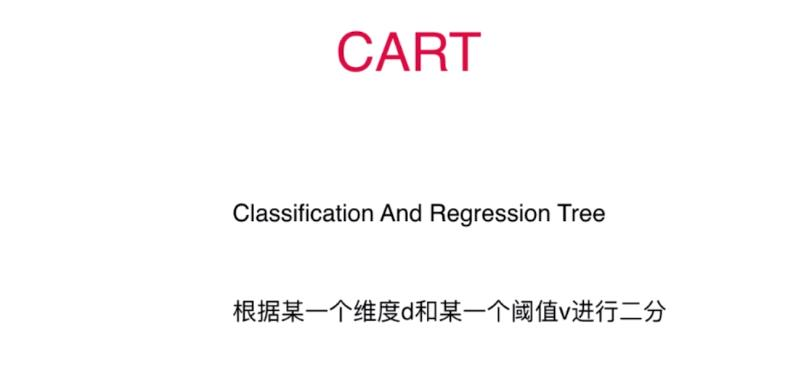
    - 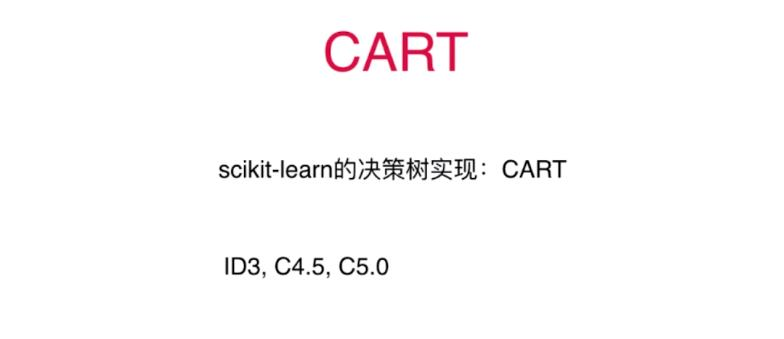
3. 优点
    - 很好的可解释性
4. 缺点
    - 决策边界相对固定，平行或垂直与某一特征轴
    - 对数据较为敏感，高度依赖调参
5. 特征
    - 非参数学习

# 使用信息熵划分

### 简单模拟绘制决策树分类情况（criterion='entropy'）

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]  #只使用后面两个特征，便于可视化
y = iris.target

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

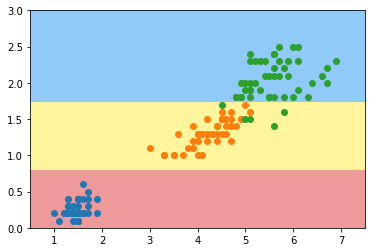

In [41]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 简单模拟使用信息熵进行划分

In [25]:
def split(X, y, d, value):  #此函数用于划分子树
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [26]:
from collections import Counter

def entropy(y):
    counter = Counter(y)  #使用Counter得到一个字典
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += - p * np.log(p)
    return res

In [27]:
def try_split(X, y):  #此函数用于划分维度、阈值
    best_entropy = float('inf')  #先设熵为一个非常大的数或者无穷大
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])  #得到X排序好的索引，但不改变原数组
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:  #要求二者不等
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

##### 第一次划分

In [28]:
best_entropy, best_d, best_v = try_split(X, y)  #第一次划分维度、阈值
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.69314718056
best_d = 0
best_v = 2.45


In [29]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)  #第一次划分子树

In [30]:
entropy(y1_l)  #这部分树不确定度为0，表示无需再划分

0.0

In [31]:
entropy(y1_r)

0.69314718055994529

##### 第二次划分

In [32]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)  #第二次划分维度、阈值
print("best_entropy2 =", best_entropy2)
print("best_d2 =", best_d2)
print("best_v2 =", best_v2)

best_entropy2 = 0.413227889936
best_d2 = 1
best_v2 = 1.75


In [33]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)  #第二次划分子树

In [34]:
entropy(y2_l)

0.30849545083110386

In [35]:
entropy(y2_r)

0.10473243910508653

# 使用基尼系数划分（criterion='gini'）

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]  #只使用后面两个特征，便于可视化
y = iris.target

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

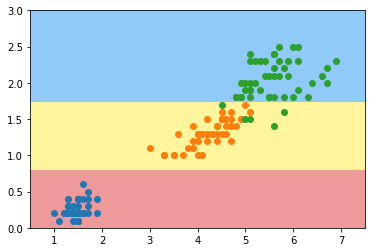

In [40]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 简单模拟使用基尼系数进行划分

In [42]:
def split(X, y, d, value):  #此函数用于划分子树
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [43]:
from collections import Counter

def gini(y):
    counter = Counter(y)  #使用Counter得到一个字典
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

In [46]:
def try_split(X, y):  #此函数用于划分维度、阈值
    best_g = float('inf')  #先设熵为一个非常大的数或者无穷大
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])  #得到X排序好的索引，但不改变原数组
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:  #要求二者不等
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
    return best_g, best_d, best_v

##### 第一次划分

In [47]:
best_g, best_d, best_v = try_split(X, y)  #第一次划分维度、阈值
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.5
best_d = 0
best_v = 2.45


In [48]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)  #第一次划分子树

In [49]:
gini(y1_l)  #这部分树不确定度为0，表示无需再划分

0.0

In [50]:
gini(y1_r)

0.5

##### 第二次划分

In [51]:
best_g, best_d, best_v = try_split(X1_r, y1_r)  #第一次划分维度、阈值
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.2105714900645938
best_d = 1
best_v = 1.75


In [52]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)  #第二次划分子树

In [53]:
gini(y2_l)

0.1680384087791495

In [54]:
gini(y2_r)

0.04253308128544431

# CART和决策树的一些超参数（网格搜索）

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

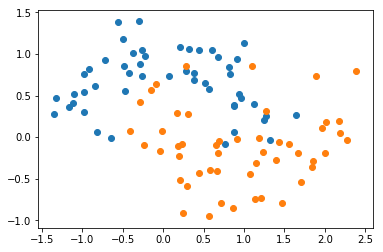

In [60]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [61]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

##### 直接使用默认参数（过拟合）

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

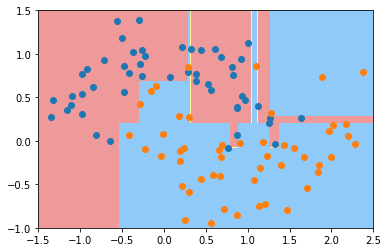

In [63]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

##### max_depth=2（设置树的最大深度）

In [65]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

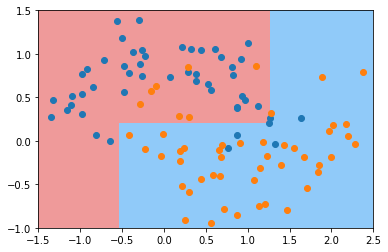

In [66]:
plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

##### min_samples_split=10（设置一个节点至少有多少个样本，设置适当多就不容易过拟合，但需避免欠拟合）

In [67]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

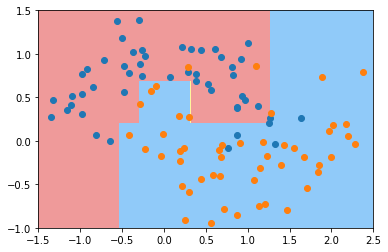

In [68]:
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

##### min_samples_leaf=6（设置一个叶子结点至少有多少个样本，越低越容易过拟合）

In [71]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

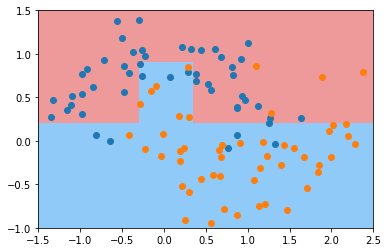

In [72]:
plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

##### max_leaf_nodes=4（设置决策树最多有多少个叶子结点，越多越容易过拟合）

In [73]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

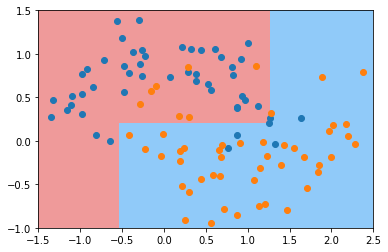

In [74]:
plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 决策树解决回归问题

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### sklearn中的DecisionTreeRegressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
dt_reg.score(X_train, y_train)  #过拟合

1.0

In [9]:
dt_reg.score(X_test, y_test)  #未调参

0.58168165423714502